# Initialize Model Inputs

In [116]:
# General
import pandas as pd
import numpy as np
import pandas as pd
import os

# umap
import umap

# sklearn
import sklearn
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Visualization
import plotly.express as px
import plotly.graph_objects as go

# Init variables
DATA_DIR = "~/Desktop/code/data/"
RANDOM_SEED = 42
TARGET = "media_id" 

In [117]:
# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
filter = df["ec"].str.contains("-")
df = df[~filter]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]
df

ec,taxon_id,media_id,1.1.1.1,1.1.1.100,1.1.1.101,1.1.1.102,1.1.1.103,1.1.1.105,1.1.1.107,1.1.1.108,...,7.6.2.12,7.6.2.13,7.6.2.14,7.6.2.15,7.6.2.16,7.6.2.2,7.6.2.5,7.6.2.7,7.6.2.8,7.6.2.9
0,100.0,J346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,J386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100225.0,J233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1002526.0,J22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004166.0,1a,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,KBase_derived_Bin.033.fastaLS_S_extracted_bins...,unknown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8707,KBase_derived_Bin.034.fastaCA_F_extracted_bins...,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8708,KBase_derived_Bin.037.fastaLS_S_extracted_bins...,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8709,KBase_derived_Bin.038.fastaLS_S_extracted_bins...,unknown,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id"], axis=1),
    df_train[TARGET],
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Supervised Methods

## Random Forest

In [21]:
rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=RANDOM_SEED
)

rft = rfc.fit(X_train, y_train)

report = classification_report(
    y_true=y_test,
    y_pred=rft.predict(X_test),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report)

              precision    recall  f1-score   support

       1031a       0.00      0.00      0.00         0
        104a       0.00      0.00      0.00         1
        104b       0.56      0.62      0.59         8
        104c       0.00      0.00      0.00         5
        104d       0.00      0.00      0.00         1
       1076b       0.67      0.67      0.67         6
       1081a       0.00      0.00      0.00         1
        110a       0.00      0.00      0.00         2
        115a       0.00      0.00      0.00         0
         11b       0.00      0.00      0.00         3
       1203a       0.54      0.30      0.39        23
        141c       0.00      0.00      0.00         1
        142a       1.00      1.00      1.00         1
        144b       0.00      0.00      0.00         1
        195c       0.00      0.00      0.00         1
          1a       0.25      0.32      0.28        28
        212a       1.00      1.00      1.00         1
        215b       0.50    

## K-Neighbors

In [26]:
knc= KNeighborsClassifier(n_neighbors=20)
knc.fit(X_train, y_train)

distances, indices = knc.kneighbors(X_test)

print(knc.predict(X_test))
indices

['J118' 'J12' 'J386' ... 'J118' 'J346' 'J14']


array([[ 176,  817,  940, ...,  474,  507,   71],
       [ 842,  714, 4517, ..., 3221, 4557, 5357],
       [ 354, 6648,  582, ..., 1179, 1640,   91],
       ...,
       [ 176,  817,  940, ...,  474,  507,   71],
       [5133, 2608, 3841, ..., 2507, 2431,  153],
       [ 223, 1011,  741, ...,  386,  766,  108]], dtype=int64)

In [27]:
report = classification_report(
    y_true=y_test,
    y_pred=knc.predict(X_test),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report)

              precision    recall  f1-score   support

       1031a       0.00      0.00      0.00         0
        104a       0.00      0.00      0.00         1
        104b       0.50      0.50      0.50         8
        104c       0.00      0.00      0.00         5
        104d       0.00      0.00      0.00         1
       1076b       0.57      0.67      0.62         6
       1081a       0.00      0.00      0.00         1
        110a       0.00      0.00      0.00         2
         11b       0.00      0.00      0.00         3
       1203a       0.35      0.26      0.30        23
        120a       0.00      0.00      0.00         0
        141c       0.00      0.00      0.00         1
        142a       0.00      0.00      0.00         1
        144b       0.00      0.00      0.00         1
        195c       0.00      0.00      0.00         1
          1a       0.23      0.32      0.26        28
        212a       0.00      0.00      0.00         1
        215b       0.00    

## XGBoost 

C:\Users\jakel\AppData\Local\Temp\ipykernel_3396\1252521087.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



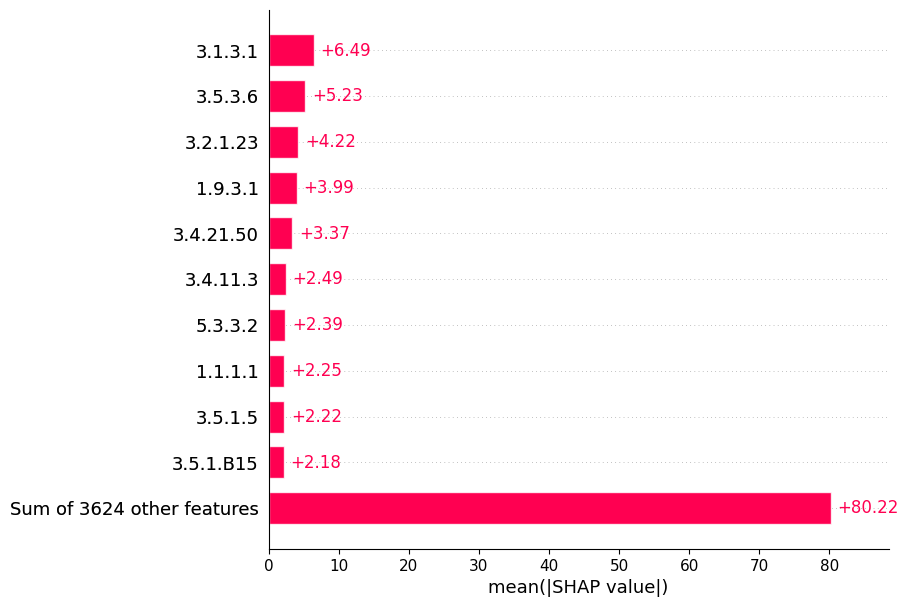

In [126]:
import xgboost
import shap

# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    random_state=RANDOM_SEED
)

model = xgboost.XGBRegressor().fit(X_train , y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.plots.initjs()
#shap.plots.beeswarm(shap_values, max_display=11)
shap.plots.bar(shap_values, max_display=11)

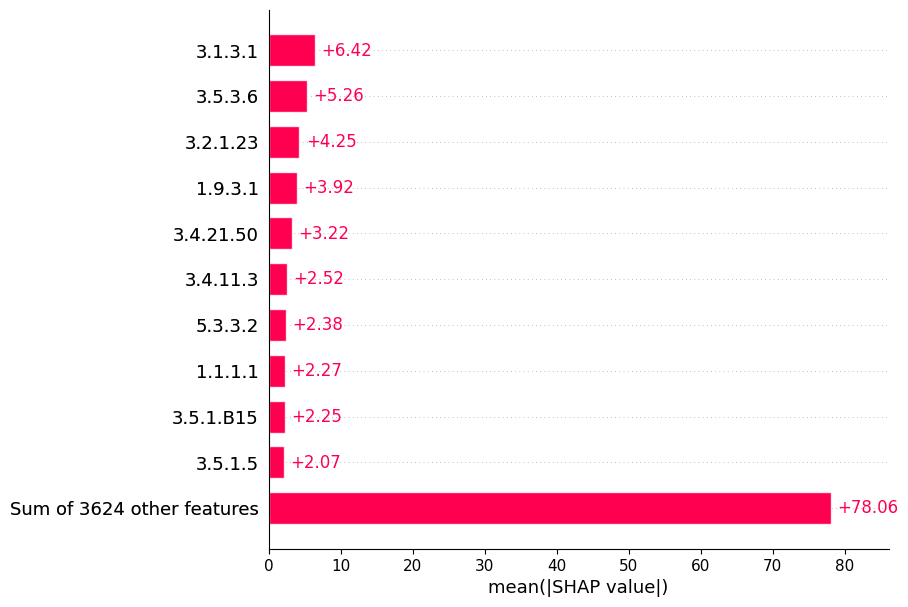

In [127]:
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=11)

# Unsupervised Methods

## PCA

In [36]:
pca = PCA(n_components=2, random_state= RANDOM_SEED)

X_train_transformed = pca.fit_transform(X_train) # fit pipeline and transform training data
X_test_transformed = pca.transform(X_test) # transform test data

explained_variance = pca.explained_variance_ratio_
print(f"Total PCA explained variance: {explained_variance.sum()}")

Total PCA explained variance: 0.5848448868881663


In [45]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

4 clusters returns a maximum Silhouette Coefficient of 0.9435838801042863


In [46]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

4 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8250586949867688


In [121]:
import plotly.express as px
fig = px.scatter_matrix(
    X_train_transformed,
    color=training_clusters,
    dimensions=range(2),
    #labels="taxon_id"
    )
fig.update_traces(diagonal_visible=False)
fig.show()

## UMAP

In [55]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    random_state=RANDOM_SEED
)

C:\Users\jakel\AppData\Local\Temp\ipykernel_3396\2910204531.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
# Test a range of parameters for dimensionality reduction
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

#umap = umap.UMAP(  
#    metric="euclidean",
#    n_epochs=500,
#    random_state=RANDOM_SEED,
#    n_jobs=1,
#    n_components=2
#)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

#search.fit(X_train, y_train)
#best_params = search.best_params_
#best_model = search.best_estimator_

#print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [66]:
reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

In [67]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

12 clusters returns a maximum Silhouette Coefficient of 0.8306539058685303


In [68]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

12 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8258286118507385


In [72]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

6771 training points
1693 test points


In [84]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

### Hamming

In [85]:
reducer = umap.UMAP(             
    metric="hamming",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable



12 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.6804642081260681


In [97]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 50):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

25 clusters returns a maximum Silhouette Coefficient of 0.7680076956748962


In [101]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=20, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

20 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.7800796031951904


In [102]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

6771 training points
1693 test points


In [103]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

### Jaccard

In [104]:
reducer = umap.UMAP(             
    metric="jaccard",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pynndescent\pynndescent_.py:962: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:127: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 5936 edges.
It has only fully disconnected 46 vertices.
Use umap.utils.disconnected_vertices() to identify them.



In [110]:
#TODO: DISCONNECT MEANS KMEANS CANNOT CLUSTER -- NO NAN!

In [111]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels

print(len(test_df), "test points")

6771 training points
1693 test points


In [114]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "Set",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

# Pipeline (EC:1,3)

# Media Clustering

## Taxonomy as features

## Components as features 

Binary input, grouped sub-solutions